In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import sys

In [3]:
import json
plt_properties = json.load(open('utils/plt_properties.json'))
fig_width = plt_properties['fig_width']
plt.rcParams.update(plt_properties['plt_params'])

In [4]:
sys.path.append(os.path.join(os.getcwd(), 'utils'))
from correlation import plot_regression
from variables import min_pred_col, vol_pred_col, min_pred_col_day, vol_pred_col_day, target_col

In [5]:
df = pd.read_csv('../Data/dataset_mlr.csv')

/tmp/ipykernel_68510/900100850.py:1: DtypeWarning: Columns (12,22,23,24,25,35,36,37,38,39,44,48,49,53,54,55,61,72,76,121,122,124,125,127,136,138,139,140,141,142,143,144,152,157,158,159,161,162,163,210,216,218,219,221,233,251,252,254,503,509,511,513,515,519,523,525,527,529) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../Data/dataset_mlr.csv')


# 3) Correlation 

## 3.1) Unnormalized

Coeffs: [1.40343845]
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             1.4034      0.039     35.893      0.000       1.327       1.480
Coeffs: [1.14835207]
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             1.1484      0.014     79.811      0.000       1.120       1.177
Coeffs: [0.40418259]
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.4042      0.039     10.495      0.000       0.329  

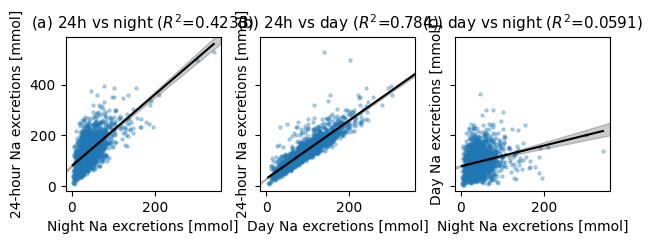

In [6]:
fig, ax = plt.subplots(1, 3, figsize=(fig_width, 0.4 * fig_width), sharex=True, sharey=True)

# 24h vs night
r_squared = plot_regression(df.una_un_mmol, df[target_col], ax[0], show_id=False)
ax[0].set(xlabel='Night Na excretions [mmol]', ylabel='24-hour Na excretions [mmol]', title=f'(a) 24h vs night ($R^2$={round(r_squared, 4)})')

# 24h vs day
r_squared = plot_regression(df.una_ud_mmol, df[target_col], ax[1], show_id=False)
ax[1].set(xlabel='Day Na excretions [mmol]', ylabel='24-hour Na excretions [mmol]', title=f'(b) 24h vs day ($R^2$={round(r_squared, 4)})')

# day vs night
r_squared = plot_regression(df.una_un_mmol, df.una_ud_mmol, ax[2], show_id=False)
ax[2].set(xlabel='Night Na excretions [mmol]', ylabel='Day Na excretions [mmol]', title=f'(c) day vs night ($R^2$={round(r_squared, 4)})')

fig.tight_layout()
fig.savefig('../Figures/correlations/regression_unnormalized.png', dpi=500)


Hourly excretion

Coeffs: [0.46648368]
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.4665      0.013     36.864      0.000       0.442       0.491
Coeffs: [0.76181343]
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.7618      0.009     82.169      0.000       0.744       0.780
Coeffs: [0.21093631]
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.2109      0.019     11.068      0.000       0.174  

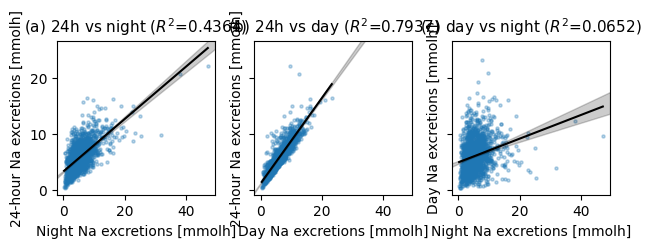

In [7]:
fig, ax = plt.subplots(1, 3, figsize=(fig_width, 0.4 * fig_width), sharex=True, sharey=True)

# 24h vs night
r_squared = plot_regression(df.una_un_mmolh, df.una_u24_mmolh, ax[0], show_id=False)
ax[0].set(xlabel='Night Na excretions [mmolh]', ylabel='24-hour Na excretions [mmolh]', title=f'(a) 24h vs night ($R^2$={round(r_squared, 4)})')

# 24h vs day
r_squared = plot_regression(df.una_ud_mmolh, df.una_u24_mmolh, ax[1], show_id=False)
ax[1].set(xlabel='Day Na excretions [mmolh]', ylabel='24-hour Na excretions [mmolh]', title=f'(b) 24h vs day ($R^2$={round(r_squared, 4)})')

# day vs night
r_squared = plot_regression(df.una_un_mmolh, df.una_ud_mmolh, ax[2], show_id=False)
ax[2].set(xlabel='Night Na excretions [mmolh]', ylabel='Day Na excretions [mmolh]', title=f'(c) day vs night ($R^2$={round(r_squared, 4)})')

fig.tight_layout()
fig.savefig('../Figures/correlations/regression_unnormalized_hour.png', dpi=500)


How does the concentration look like? Is day vs night better?

Coeffs: [0.71027148]
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.7103      0.014     52.409      0.000       0.684       0.737
Coeffs: [0.86014922]
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.8601      0.007    123.399      0.000       0.846       0.874
Coeffs: [0.57722105]
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.5772      0.020     29.567      0.000       0.539  

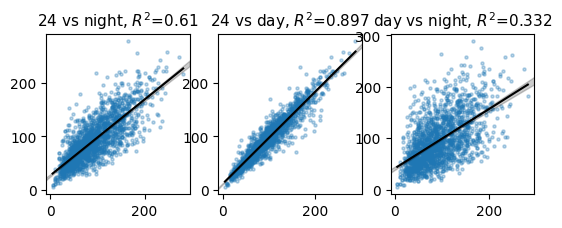

In [8]:
fig, ax = plt.subplots(1, 3, figsize=(fig_width, 0.33 * fig_width))

# 24h vs night
x = df.una_un
y = df.una_u24 * 1000 # error, probably
r_squared = plot_regression(x, y, ax[0], show_id=False)
ax[0].set_title(f'24 vs night, $R^2$={round(r_squared, 3)}')

# 24h vs day
x = df.una_ud
y = df.una_u24 * 1000 # error, probably
r_squared = plot_regression(x, y, ax[1], show_id=False)
ax[1].set_title(f'24 vs day, $R^2$={round(r_squared, 3)}')

# day vs night
x = df.una_un
y = df.una_ud
r_squared = plot_regression(x, y, ax[2], show_id=False)
ax[2].set_title(f'day vs night, $R^2$={round(r_squared, 3)}');


In [9]:
df.una_u24

0       0.140504
1       0.039782
2       0.049423
3       0.039532
4       0.146022
          ...   
1752    0.101187
1753    0.087719
1754    0.073264
1755    0.023999
1756    0.117957
Name: una_u24, Length: 1757, dtype: float64

## 3.2) Normalization by duration

### 3.2.1) All selected data

Coeffs: [0.46648368]
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.4665      0.013     36.864      0.000       0.442       0.491
Coeffs: [0.76181343]
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.7618      0.009     82.169      0.000       0.744       0.780
Coeffs: [0.21093631]
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.2109      0.019     11.068      0.000       0.174  

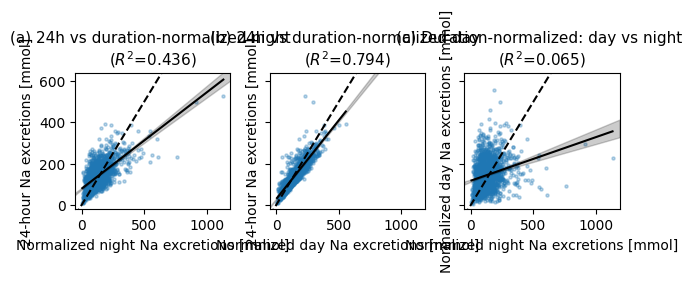

In [10]:
fig, ax = plt.subplots(1, 3, figsize=(fig_width, 0.4 * fig_width), sharex=True, sharey=True)

# 24h vs night
r_squared = plot_regression(df[min_pred_col], df[target_col], ax[0])
ax[0].set(xlabel='Normalized night Na excretions [mmol]', ylabel='24-hour Na excretions [mmol]',
          title=f'(a) 24h vs duration-normalized night \n($R^2$={round(r_squared, 3)})')

# 24h vs day
r_squared = plot_regression(df[min_pred_col_day], df[target_col], ax[1])
ax[1].set(xlabel='Normalized day Na excretions [mmol]', ylabel='24-hour Na excretions [mmol]',
          title=f'(b) 24h vs duration-normalized day \n($R^2$={round(r_squared, 3)})')

# day vs night
r_squared = plot_regression(df[min_pred_col], df[min_pred_col_day], ax[2])
ax[2].set(xlabel='Normalized night Na excretions [mmol]', ylabel='Normalized day Na excretions [mmol]',
          title=f'(c) Duration-normalized: day vs night \n($R^2$={round(r_squared, 3)})')

fig.tight_layout()
fig.savefig('../Figures/correlations/regression_duration_normalized.png', dpi=500)


### 3.2.2) Dependence on duration criterion

Coeffs: [0.76181343]
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.7618      0.009     82.169      0.000       0.744       0.780
Coeffs: [0.78747423]
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.7875      0.015     51.219      0.000       0.757       0.818
Coeffs: [0.74564101]
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.7456      0.011     65.129      0.000       0.723  

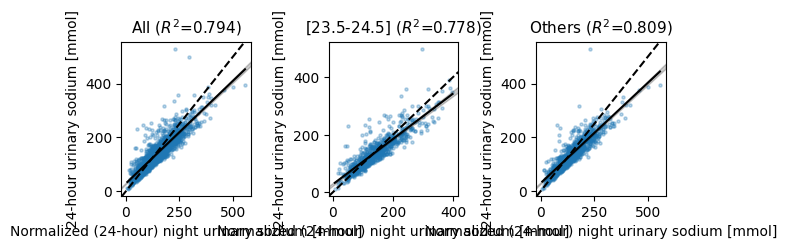

In [11]:
fig, ax = plt.subplots(1, 3, figsize=(fig_width, 0.4 * fig_width))

x = df[min_pred_col_day]
y = df[target_col]
r_squared = plot_regression(x, y, ax[0])
ax[0].set_title(f'All ($R^2$={round(r_squared, 3)})')
ax[0].set_xlabel('Normalized (24-hour) night urinary sodium [mmol]')
ax[0].set_ylabel('24-hour urinary sodium [mmol]')


x = df[(df.u24_hours >= 23.5) * (df.u24_hours <= 24.5)][min_pred_col_day]
y = df[(df.u24_hours >= 23.5) * (df.u24_hours <= 24.5)][target_col]
r_squared = plot_regression(x, y, ax[1])
ax[1].set_title(f'[23.5-24.5] ($R^2$={round(r_squared, 3)})')
ax[1].set_xlabel('Normalized (24-hour) night urinary sodium [mmol]')
ax[1].set_ylabel('24-hour urinary sodium [mmol]')

x = df[(df.u24_hours < 23.5) + (df.u24_hours > 24.5)][min_pred_col_day]
y = df[(df.u24_hours < 23.5) + (df.u24_hours > 24.5)][target_col]
r_squared = plot_regression(x, y, ax[2])
ax[2].set_title(f'Others ($R^2$={round(r_squared, 3)})')
ax[2].set_xlabel('Normalized (24-hour) night urinary sodium [mmol]')
ax[2].set_ylabel('24-hour urinary sodium [mmol]')

fig.tight_layout()

### 3.2.3) Influence of intercept

Coeffs: [0.75518348]
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.7552      0.009     87.731      0.000       0.738       0.772
Coeffs: [0.9213205]
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.7552      0.009     87.731      0.000       0.738       0.772


0.7660983090121999

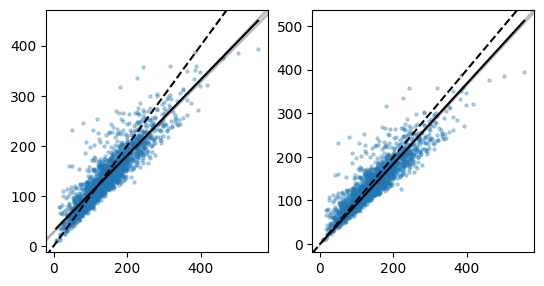

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(fig_width, 0.5 * fig_width))
df_filtered = df[df[min_pred_col] < 700]

plot_regression(df_filtered[min_pred_col_day], df_filtered[target_col], ax[0], fit_intercept=True)
plot_regression(df_filtered[min_pred_col_day], df_filtered[target_col], ax[1], fit_intercept=False)

5


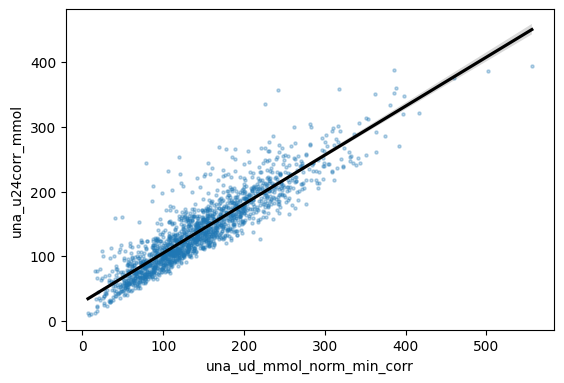

In [13]:
fig, ax = plt.subplots(figsize=(fig_width, 0.66 * fig_width))

df_filtered = df[df[min_pred_col] < 600]
print(len(df) - len(df_filtered))
g = sns.regplot(
    data=df_filtered, x=min_pred_col_day, y=target_col,
    line_kws={'color': 'k'}, scatter_kws={'s': 5, 'alpha': 0.3}, ax=ax);

In [14]:
abs_errors = df[min_pred_col_day] - df[target_col]
rel_errors = abs_errors / df[target_col]

discr_covars = [
    
]
cont_covars = [
    # calcium
    'uca_un',
    'uca_un_mmol',
    'uca_un_mmolh'
]

Text(0.5, 1.0, 'Relative error vs true value')

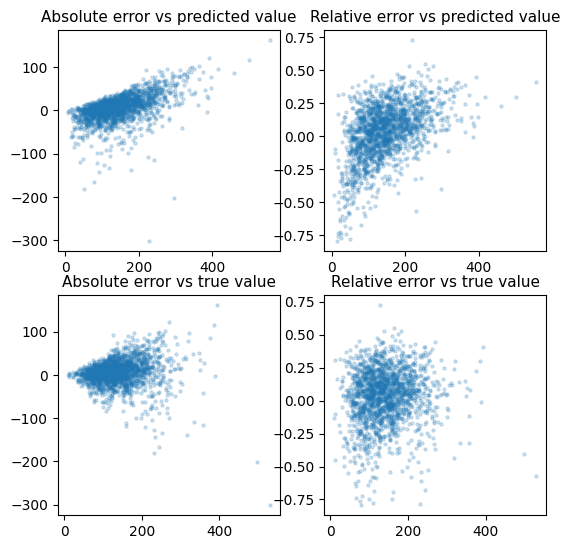

In [15]:
fig, ax = plt.subplots(2, 2, figsize=(fig_width, fig_width))

ax[0, 0].scatter(df[min_pred_col_day], abs_errors, s=5, alpha=0.2)
ax[0, 0].set_title('Absolute error vs predicted value')

ax[0, 1].scatter(df[min_pred_col_day], rel_errors, s=5, alpha=0.2)
ax[0, 1].set_title('Relative error vs predicted value')

ax[1, 0].scatter(df[target_col], abs_errors, s=5, alpha=0.2)
ax[1, 0].set_title('Absolute error vs true value')

ax[1, 1].scatter(df[target_col], rel_errors, s=5, alpha=0.2)
ax[1, 1].set_title('Relative error vs true value')

## 3.3) Normalization by volume

Coeffs: [0.43666961]
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.4367      0.012     35.893      0.000       0.413       0.461
Coeffs: [0.78473968]
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.7847      0.010     79.811      0.000       0.765       0.804
Coeffs: [0.18402916]
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.1840      0.018     10.495      0.000       0.150  

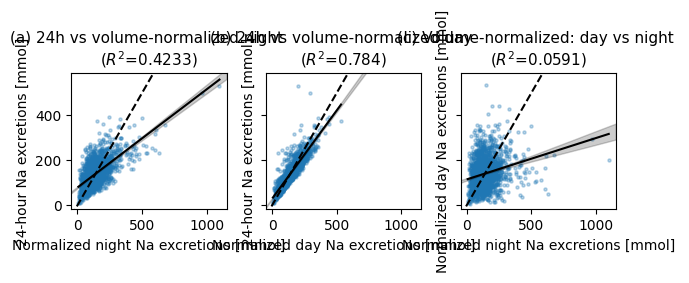

In [16]:
fig, ax = plt.subplots(1, 3, figsize=(fig_width, 0.4 * fig_width), sharex=True, sharey=True)

# 24h vs night
r_squared = plot_regression(df[vol_pred_col], df[target_col], ax[0])
ax[0].set(xlabel='Normalized night Na excretions [mmol]', ylabel='24-hour Na excretions [mmol]',
          title=f'(a) 24h vs volume-normalized night \n($R^2$={round(r_squared, 4)})')

# 24h vs day
r_squared = plot_regression(df[vol_pred_col_day], df[target_col], ax[1])
ax[1].set(xlabel='Normalized day Na excretions [mmol]', ylabel='24-hour Na excretions [mmol]',
          title=f'(b) 24h vs volume-normalized day \n($R^2$={round(r_squared, 4)})')

# day vs night
r_squared = plot_regression(df[vol_pred_col], df[vol_pred_col_day], ax[2])
ax[2].set(xlabel='Normalized night Na excretions [mmol]', ylabel='Normalized day Na excretions [mmol]',
          title=f'(c) Volume-normalized: day vs night \n($R^2$={round(r_squared, 4)})')

fig.tight_layout()
fig.savefig('../Figures/correlations/regression_volume_normalized.png', dpi=500)


## 3.4) Night predictions only

Coeffs: [1.40343845]
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             1.4034      0.039     35.893      0.000       1.327       1.480
Coeffs: [0.46648368]
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.4665      0.013     36.864      0.000       0.442       0.491
Coeffs: [0.43666961]
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.4367      0.012     35.893      0.000       0.413  

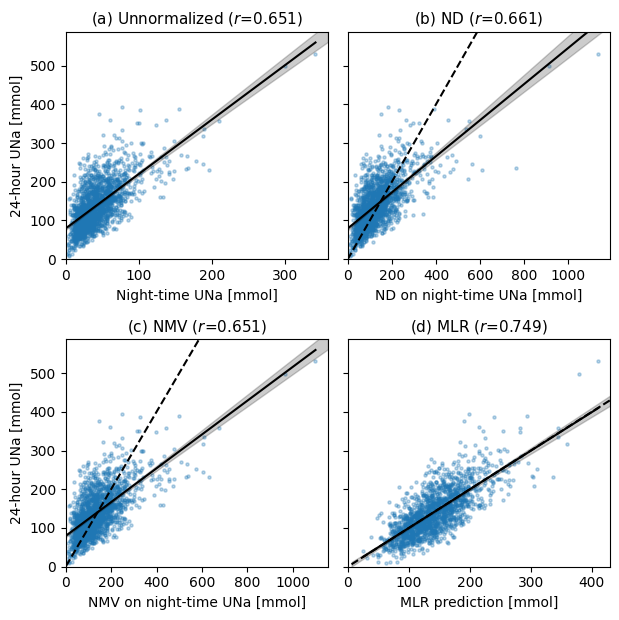

In [17]:
fig, ax = plt.subplots(2, 2, figsize=(fig_width, fig_width), sharey=True)

# no normalization
r_squared = plot_regression(df.una_un_mmol, df[target_col], ax[0][0], show_id=False)
ax[0][0].set(xlabel='Night-time UNa [mmol]', ylabel='24-hour UNa [mmol]',
          title=f'(a) Unnormalized ($r$={round(r_squared ** 0.5, 3)})')

# duration normalization
r_squared = plot_regression(df[min_pred_col], df[target_col], ax[0][1])
ax[0][1].set(xlabel='ND on night-time UNa [mmol]',
          title=f'(b) ND ($r$={round(r_squared ** 0.5, 3)})')

# duration normalization
r_squared = plot_regression(df[vol_pred_col], df[target_col], ax[1][0])
ax[1][0].set(xlabel='NMV on night-time UNa [mmol]', ylabel='24-hour UNa [mmol]',
          title=f'(c) NMV ($r$={round(r_squared ** 0.5, 3)})')

# multivariate linear regression prediction
x = df[~(df.mlr_preds.isna())].mlr_preds
y = df[~(df.mlr_preds.isna())][target_col]
r_squared = plot_regression(x, y, ax[1][1])
ax[1][1].set(xlabel='MLR prediction [mmol]',
          title=f'(d) MLR ($r$={round(r_squared ** 0.5, 3)})')

for axis in [axis for subax in ax for axis in subax]:
    axis.set_xlim(left=0.)
    axis.set_ylim(bottom=0.)

fig.tight_layout()
fig.savefig('../Figures/correlations/regression_night.png', dpi=500)

Removing 2 outliers
Coeffs: [1.4115901]
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             1.4116      0.042     33.936      0.000       1.330       1.493
Coeffs: [0.47409809]
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.4741      0.014     34.985      0.000       0.448       0.501
Coeffs: [0.43920594]
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.4392      0.013     33.936      

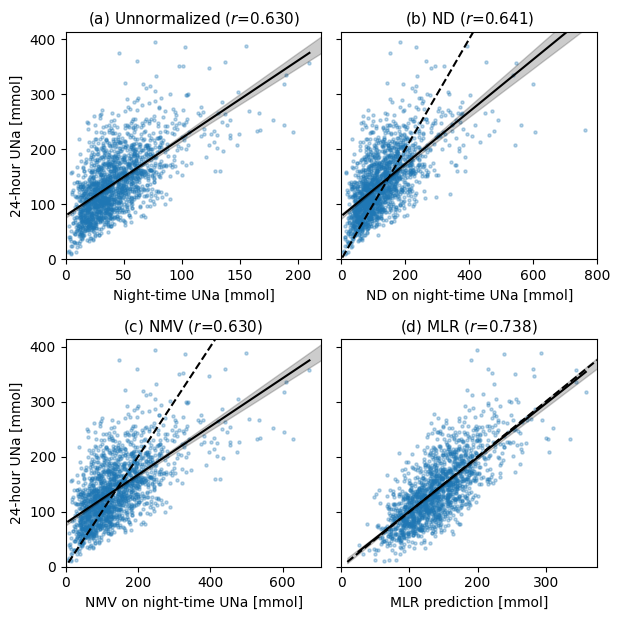

In [18]:
fig, ax = plt.subplots(2, 2, figsize=(fig_width, fig_width), sharey=True)

df_no_out = df[df.una_un_mmol < 280]
print("Removing", len(df) - len(df_no_out), "outliers")

# no normalization
r_squared = plot_regression(df_no_out.una_un_mmol, df_no_out[target_col], ax[0][0], show_id=False)
ax[0][0].set(xlabel='Night-time UNa [mmol]', ylabel='24-hour UNa [mmol]',
          title=f'(a) Unnormalized ($r$={(r_squared ** 0.5):.3f})')

# duration normalization
r_squared = plot_regression(df_no_out[min_pred_col], df_no_out[target_col], ax[0][1])
ax[0][1].set(xlabel='ND on night-time UNa [mmol]',
          title=f'(b) ND ($r$={(r_squared ** 0.5):.3f})')

# duration normalization
r_squared = plot_regression(df_no_out[vol_pred_col], df_no_out[target_col], ax[1][0])
ax[1][0].set(xlabel='NMV on night-time UNa [mmol]', ylabel='24-hour UNa [mmol]',
          title=f'(c) NMV ($r$={(r_squared ** 0.5):.3f})')

# multivariate linear regression prediction
x = df_no_out[~(df_no_out.mlr_preds.isna())].mlr_preds
y = df_no_out[~(df_no_out.mlr_preds.isna())][target_col]
r_squared = plot_regression(x, y, ax[1][1])
ax[1][1].set(xlabel='MLR prediction [mmol]',
          title=f'(d) MLR ($r$={(r_squared ** 0.5):.3f})')

for axis in [axis for subax in ax for axis in subax]:
    axis.set_xlim(left=0.)
    axis.set_ylim(bottom=0.)

fig.tight_layout()
fig.savefig('../Figures/correlations/regression_night_no_outliers.png', dpi=500)

Dependency on duration

Coeffs: [1.8507624]
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             1.8508      0.681      2.717      0.007       0.515       3.187
Coeffs: [-7.86440932]
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            -7.8644      1.438     -5.469      0.000     -10.685      -5.044
Coeffs: [-2.67801667]
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            -2.6780      0.881     -3.041      0.002      -4.406 

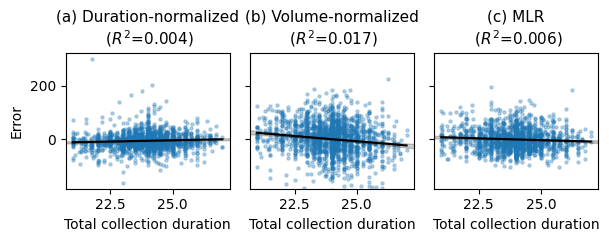

In [19]:
fig, ax = plt.subplots(1, 3, figsize=(fig_width, 0.4 * fig_width), sharey=True)

# duration normalization
err = df[target_col] - df[min_pred_col_day]
r_squared = plot_regression(df.u24_hours, err, ax[0], show_id=False)
ax[0].set(xlabel='Total collection duration', ylabel='Error',
          title=f'(a) Duration-normalized\n ($R^2$={round(r_squared, 3)})')

# volume normalization
err = df[target_col] - df[vol_pred_col]
r_squared = plot_regression(df.u24_hours, err, ax[1], show_id=False)
ax[1].set(xlabel='Total collection duration',
          title=f'(b) Volume-normalized\n ($R^2$={round(r_squared, 3)})')

# mlr
df_sub = df[~df.mlr_preds.isna()]
err = df_sub[target_col] - df_sub.mlr_preds
r_squared = plot_regression(df_sub.u24_hours, err, ax[2], show_id=False)
ax[2].set(xlabel='Total collection duration',
          title=f'(c) MLR\n ($R^2$={round(r_squared, 3)})')

fig.tight_layout()

In [20]:
df[target_col].min()

9.507398948178656

## 3.5) Day predictions only

Coeffs: [1.14835207]
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             1.1484      0.014     79.811      0.000       1.120       1.177
Coeffs: [0.76181343]
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.7618      0.009     82.169      0.000       0.744       0.780
Coeffs: [0.78473968]
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.7847      0.010     79.811      0.000       0.765  

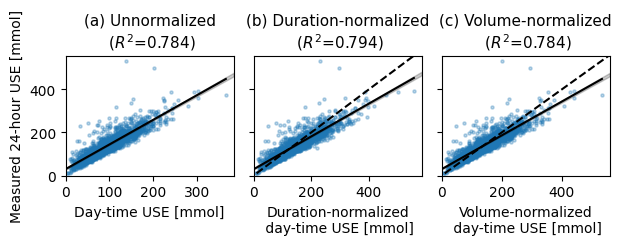

In [21]:
fig, ax = plt.subplots(1, 3, figsize=(fig_width, 0.4 * fig_width), sharey=True)

# no normalization
r_squared = plot_regression(df.una_ud_mmol, df[target_col], ax[0], show_id=False)
ax[0].set(xlabel='Day-time USE [mmol]', ylabel='Measured 24-hour USE [mmol]',
          title=f'(a) Unnormalized\n ($R^2$={round(r_squared, 3)})')

# duration normalization
r_squared = plot_regression(df[min_pred_col_day], df[target_col], ax[1])
ax[1].set(xlabel='Duration-normalized\n day-time USE [mmol]',
          title=f'(b) Duration-normalized\n ($R^2$={round(r_squared, 3)})')

# duration normalization
r_squared = plot_regression(df[vol_pred_col_day], df[target_col], ax[2])
ax[2].set(xlabel='Volume-normalized\n day-time USE [mmol]',
          title=f'(c) Volume-normalized\n ($R^2$={round(r_squared, 3)})')

for axis in ax:
    axis.set_xlim(left=0.)
    axis.set_ylim(bottom=0.)

fig.tight_layout()
